# 컬러분석 레포트 코드

In [ ]:
import extcolors
from PIL import Image

#RGB 지표 추출
img = Image.open("j_g_ok_1042533448407401622.jpg")
colors, pixel_count = extcolors.extract_from_image(img)

pixel_output = 0
palette=[]
for c in colors:
    pixel_output += c[1]
    print(f'{c[0]} : {round((c[1] / pixel_count) * 100, 2)}% ({c[1]})')
    palette.append(c[0])
print(f'Pixels in output: {pixel_output} of {pixel_count}')

(223, 223, 221) : 76.54% (892771)
(135, 135, 135) : 15.98% (186398)
(45, 45, 45) : 6.38% (74473)
(220, 59, 65) : 0.89% (10362)
(255, 160, 174) : 0.11% (1334)
(115, 44, 42) : 0.09% (1031)
(149, 137, 79) : 0.0% (31)
Pixels in output: 1166400 of 1166400


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from colormap import rgb2hex
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#컬러분석 레포트 코드
def exact_color(input_image, resize, tolerance, zoom):
    
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13) 
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

/var/folders/p1/fd2s37114219lyvgkk2dr5p00000gn/T/ipykernel_40843/46129179.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


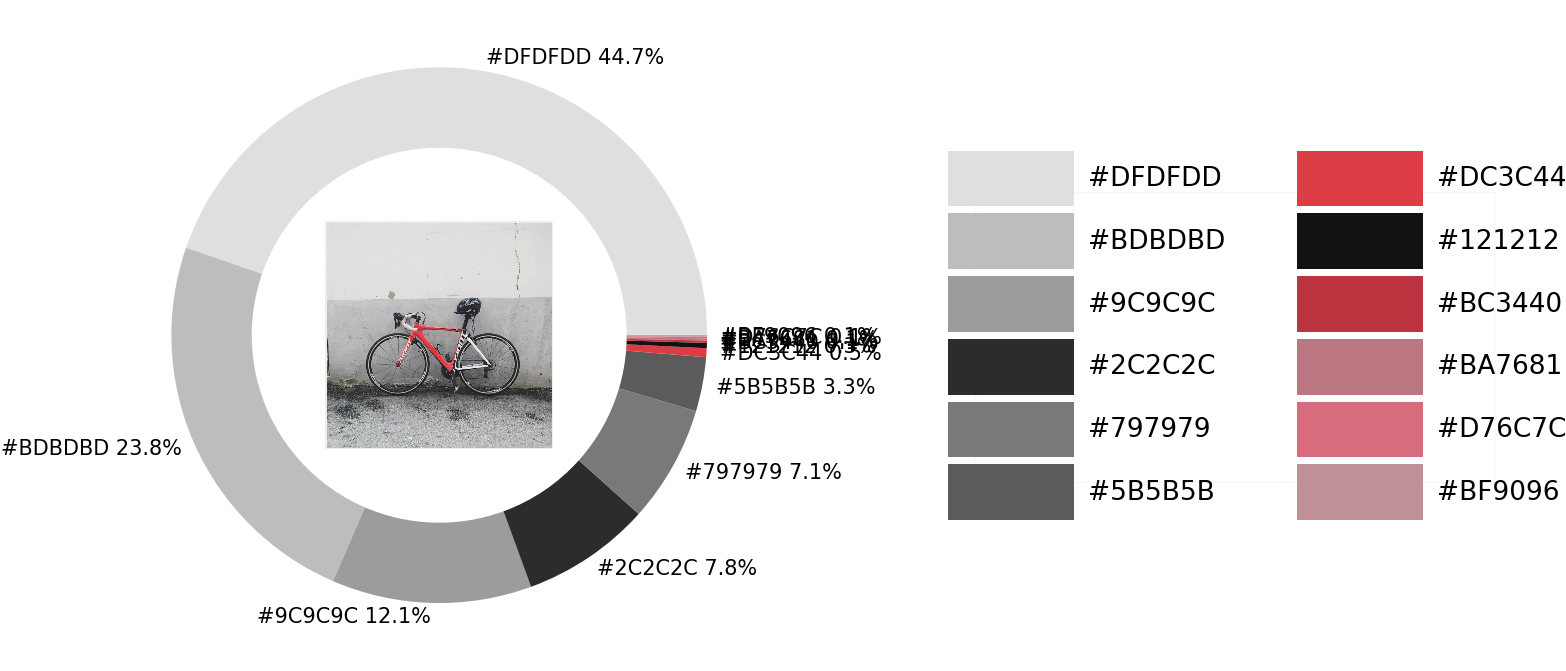

In [ ]:
exact_color('j_g_ok_1042533448407401622.jpg', 900, 12, 1.8) #exact_color('image name', resized_width, tolerance, zoom)